In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Imported all the useful libraries

# Dataset-1

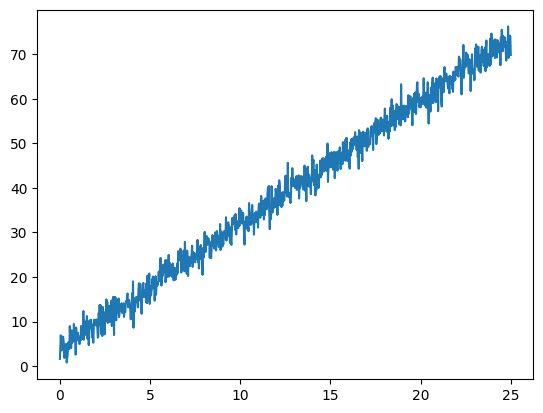

In [7]:
x1=[]
y1=[]
filename = 'dataset1.txt'
with open(filename, "r") as file:
    data=file.readlines()
    for l in data:
        l=l.split()
        x1.append(float(l[0]))
        y1.append(float(l[1]))

x1=np.asarray(x1)
y1=np.asarray(y1)
plt.plot(x1, y1)

* This cell reads the data from the file dataset.txt and stores the values of x and y in the lists x1 and y1. Then converts them to numpy arrays and plots the graph
* This graph looks similar to straight line with noise.

In [3]:
def stline(x, m, c):
    return m * x + c

Here a function stline is defined which takes x, m = the slope of the straight line and c = intercept as arguments and returns the y value.

In [5]:
M = np.column_stack([x1, np.ones(len(x1))])
(m1, c1), _, _, _ = np.linalg.lstsq(M, y1, rcond=None)
print(f"The slope and intercept of the straight line respectively ar m1 = {m1} and c1 = {c1}\nThe estimated equation is y = {m1} x + {c1}")
%timeit np.linalg.lstsq(M, y1, rcond=None)

The slope and intercept of the straight line respectively ar m1 = 2.791124245414918 and c1 = 3.8488001014307436
The estimated equation is y = 2.791124245414918 x + 3.8488001014307436
46 µs ± 8.48 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


* As the plot of the given dataset looks like a straight line, here the least square function is used to estimate the values of the slope and intercept and the estimated values of slope and intercept are m1 = 2.791124245414918 and c1 = 3.8488001014307436.
* The time taken by leastsquare function to estimate this values is 19.6 $\mu$ s

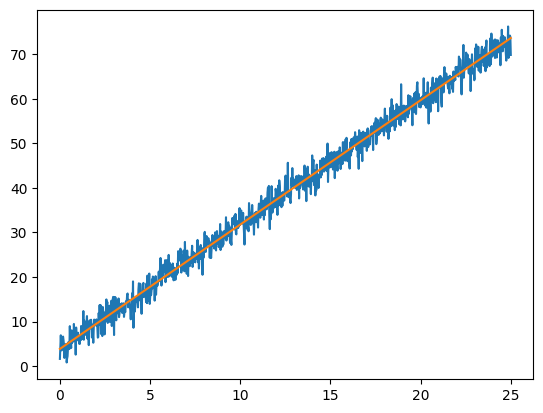

In [6]:
y1_l=stline(x1,m1,c1)
plt.plot(x1, y1, x1, y1_l)

Here we are plotting both the given dataset(blue) and estimated fit(orange) got using lstsq

In [6]:
from scipy.optimize import curve_fit
(m2, c2), pcov = curve_fit(stline, x1, y1)
print(f"The slope and intercept of the straight line respectively ar m2 = {m2} and c2 = {c2}\nThe estimated equation is y = {m2} x + {c2}")
%timeit curve_fit(stline, x1, y1)

The slope and intercept of the straight line respectively ar m2 = 2.7911242448201588 and c2 = 3.848800111263445
The estimated equation is y = 2.7911242448201588 x + 3.848800111263445
247 µs ± 40.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


* The curve_fit function from scipy is used to get the estimates for slope and intercept and they are m2 = 2.7911242448201588 and c2 = 3.848800111263445
* The time taken to estimate this values is 247 $\mu$ s

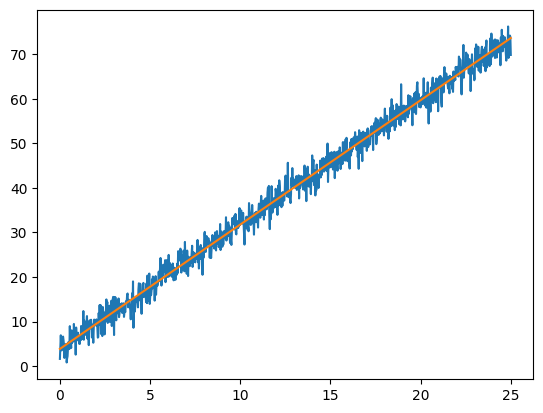

In [7]:
y1_c=stline(x1,m2,c2)
plt.plot(x1, y1, x1, y1_c)

Here we are plotting both the given dataset(blue) and estimated fit(orange) got using curve_fit

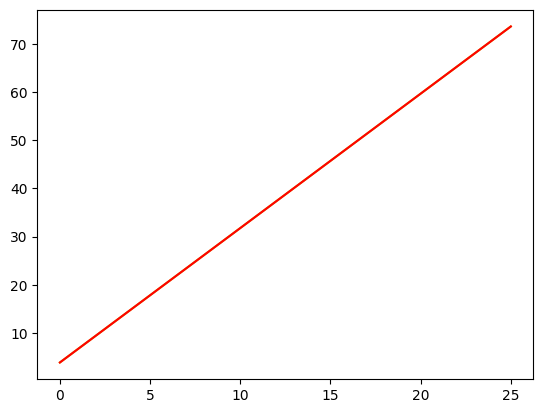

In [8]:
plt.plot(x1, y1_c, 'y', x1, y1_l, 'r')
# plt.plot(x1, y1_l, 'r', x1, y1_c, 'y')

Here i am plotting both the estimates i got using lstsq and curve_fit.

<ErrorbarContainer object of 3 artists>

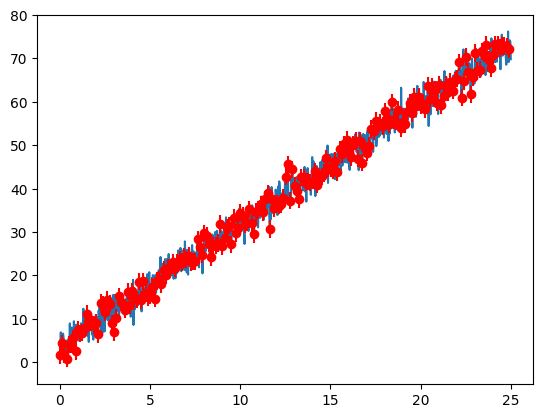

In [9]:
plt.plot(x1,y1)
plt.errorbar(x1[::5], y1[::5], np.std(y1-y1_l), fmt='ro')

Here we are plotting the error bars with yerr as standard deviation of the noise in the given data set.

In [10]:
size_of_errorbars=1.96*np.std(y1-y1_l)
print(f'size of errorbars: {1.96*np.std(y1-y1_l)}')

size of errorbars: 3.9118636225219166


The size of error bar will be 1.96 times the error used to plot the error bars

In [11]:
diff=np.square(np.subtract(y1_l, y1_c)).mean()
print(diff)

2.4212178149379354e-17


Here i am taking the difference between each value of y we got using lstsq and curve_fit and calculating the mean of it. 

### Observations

* From the plot of the given data set we can see that this is a straight line 
* so i have used lstsq to get the estimate but then i have also checked with curve_fit and calculated the difference as shown in the above cell
* we can see that there is a very small difference between them, so i think using anyone of them will be fine but according to time taken curve_fit takes more time.

# Dataset-2

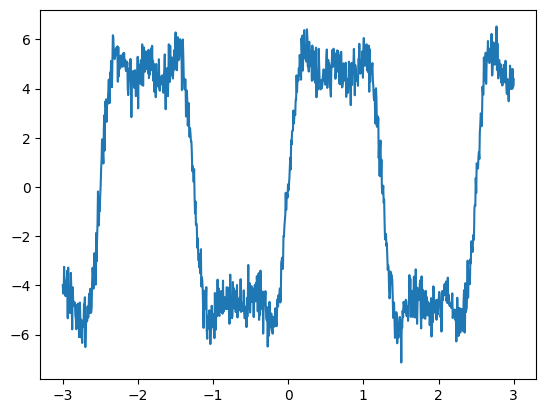

In [12]:
x2=[]
y2=[]
filename = 'dataset2.txt'
with open(filename, "r") as file:
    data=file.readlines()
    for l in data:
        l=l.split()
        x2.append(float(l[0]))
        y2.append(float(l[1]))

x2=np.asarray(x2)
y2=np.asarray(y2)
plt.plot(x2, y2)

This is a sum of 3 sine waves 1st, 3rd and 5th harmonics i.e. the frequencies of the sin waves will be w, 3w and 5w and the amplitudes will be a1>a2>a3 and w will be equal to the frequency of the given function. So we will use curve_fit to get the estimate

In [13]:
def func(x,w,a1,a2,a3):
    return a1*np.sin(w*x)+a2*np.sin(3*w*x)+a3*np.sin(5*w*x)

Here we are defining that function i  have mentioned before

In [14]:
from scipy.optimize import curve_fit
(w, a1,a2,a3), pcov = curve_fit(func, x2, y2)
print(f"The wavelenths of 1st, 2nd, and 3rd harmonics are w = {w}, 3w = {3*w}, 5w = {5*w} and the amplitudes of 1st, 2nd, 3rd harmonics are a1 = {a1}, a2 = {a2}, a3 = {a3}\nThe estimated equation is y = {a1} sin({w} x) + {a2} sin({3*w} x)+ {a3} sin({5*w} x)")

The wavelenths of 1st, 2nd, and 3rd harmonics are w = 0.840458258714396, 3w = 2.5213747761431877, 5w = 4.20229129357198 and the amplitudes of 1st, 2nd, 3rd harmonics are a1 = 0.036390745839994514, a2 = 6.082552583736292, a3 = -0.06688134106152409
The estimated equation is y = 0.036390745839994514 sin(0.840458258714396 x) + 6.082552583736292 sin(2.5213747761431877 x)+ -0.06688134106152409 sin(4.20229129357198 x)


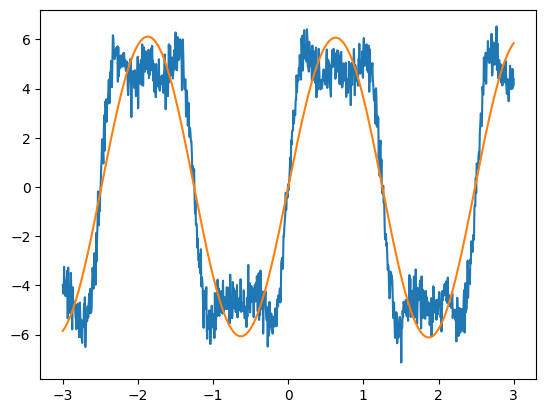

In [16]:
y2_c = func(x2,w,a1,a2,a3)
plt.plot(x2,y2,x2,y2_c)

In [18]:
from scipy.optimize import curve_fit
(w, a1,a2,a3), pcov = curve_fit(func, x2, y2, p0=(2.5,1,1,1))
print(f"The wavelenths of 1st, 2nd, and 3rd harmonics are w = {w}, 3w = {3*w}, 5w = {5*w} and the amplitudes of 1st, 2nd, 3rd harmonics are a1 = {a1}, a2 = {a2}, a3 = {a3}\nThe estimated equation is y = {a1} sin({w} x) + {a2} sin({3*w} x)+ {a3} sin({5*w} x)")

The wavelenths of 1st, 2nd, and 3rd harmonics are w = 2.512734463620896, 3w = 7.538203390862687, 5w = 12.56367231810448 and the amplitudes of 1st, 2nd, 3rd harmonics are a1 = 6.011119946742541, a2 = 2.001459363576296, a3 = 0.9809052713126482
The estimated equation is y = 6.011119946742541 sin(2.512734463620896 x) + 2.001459363576296 sin(7.538203390862687 x)+ 0.9809052713126482 sin(12.56367231810448 x)


Here in the curve_fit we are using p0 which takes the initial guesses for the estimates and from the original dataset graph we can see that w is approximately 2.5. If i do not use the p0 curve_fit is estimating the curve to a normal sine wave kind of graph.

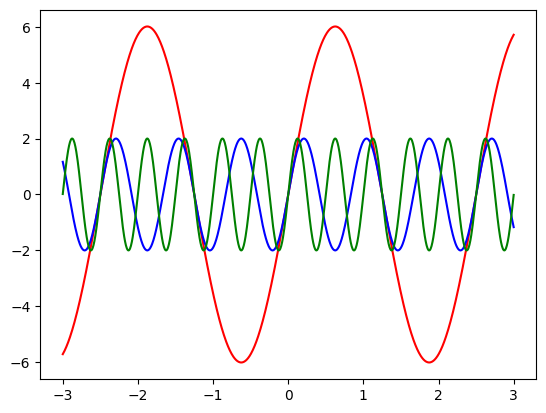

In [19]:
sin_1=a1*np.sin(w*x2)
sin_2=a2*np.sin(3*w*x2)
sin_3=a2*np.sin(5*w*x2)
plt.plot(x2,sin_1,'r', x2,sin_2,'b', x2,sin_3, 'g')

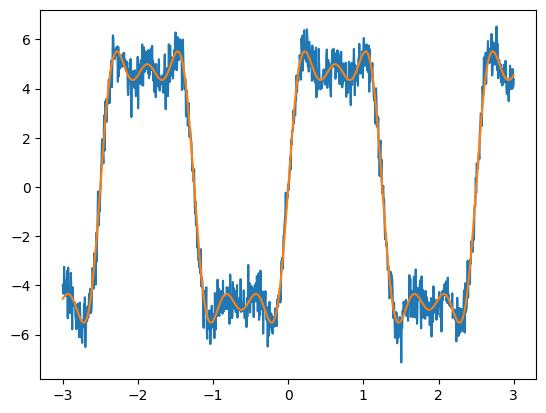

In [20]:
y2_c = func(x2,w,a1,a2,a3)
plt.plot(x2,y2,x2,y2_c)

Here we are plotting the estimate

<ErrorbarContainer object of 3 artists>

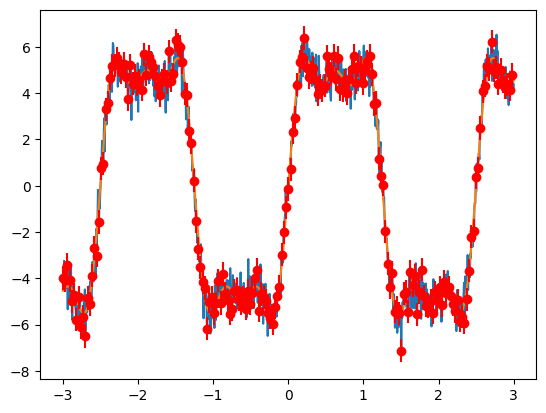

In [21]:
plt.plot(x2,y2,x2,y2_c)
plt.errorbar(x2[::5], y2[::5], np.std(y2-y2_c), fmt='ro')

Here we are plotting the error bars with yerr as standard deviation of the noise in the given data set.

In [22]:
size_of_errorbars=1.96*np.std(y2-y2_c)
print(f'size of errorbars: {1.96*np.std(y2-y2_c)}')

size of errorbars: 0.9855517243513262


Here we are plotting the error bars with yerr as standard deviation of the noise in the given data set.

### Observations

* From the plot of the given dataset we can observe that it is a summation of 3 sine waves
* And they are the 1st 3rd and 5th harmonics of the fundamental frequency w=2.512734463620896 and the amplitudes will be a1=6.011119946742541, a2=2.001459363576296, a3=0.9809052713126482

# Dataset-3

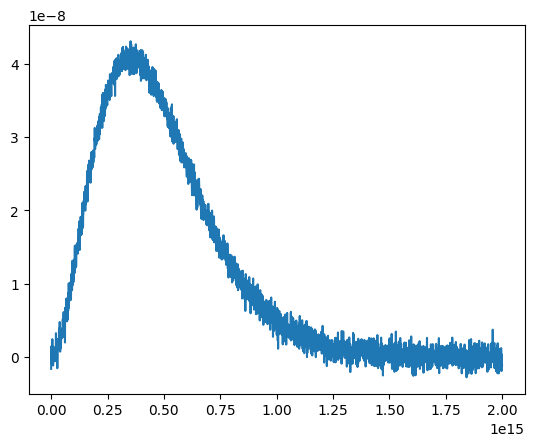

In [23]:
x3=[]
y3=[]
filename = 'dataset3.txt'
with open(filename, "r") as file:
    data=file.readlines()
    for l in data:
        l=l.split()
        x3.append(float(l[0]))
        y3.append(float(l[1]))

x3=np.asarray(x3)
y3=np.asarray(y3)
plt.plot(x3, y3)

In [24]:
k=1.38e-23
c=3.0e8
def planck(v, T, h):
    return 2*h*((v)**3)/((c**2)*(np.exp((h*(v))/(k*T))-1))


Here we are defining the planck's law which takes frequency, temperature and planck's constant as arguments and returns the radition.

In [25]:
from scipy.optimize import curve_fit
(T, h), pcov = curve_fit(planck, x3, y3)
print(f"The estimated values of Temperature and Planck's constant are T = {T} and h = {h}")

The estimated values of Temperature and Planck's constant are T = 1.0 and h = 1.0


C:\Users\gvvpr\AppData\Local\Temp\ipykernel_984\4284930493.py:4: RuntimeWarning: overflow encountered in exp
  return 2*h*((v)**3)/((c**2)*(np.exp((h*(v))/(k*T))-1))
c:\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Here i am using the curve_fit to get the estimates of T and h but here we are get a runtime warning that overflow is encountered and also the values of T and h we got are improper.

In [26]:
from scipy.optimize import curve_fit
(T, h), pcov = curve_fit(planck, x3, y3,p0=(100,1e-34))
print(f"The estimated values of Temperature and Planck's constant are T = {T} and h = {h}")

The estimated values of Temperature and Planck's constant are T = 6011.361511513504 and h = 6.643229743118619e-34


So i have used the p0 and guessed that T will be in the order of 100 and h will be in the order of e-34 and we got the proper estimates.

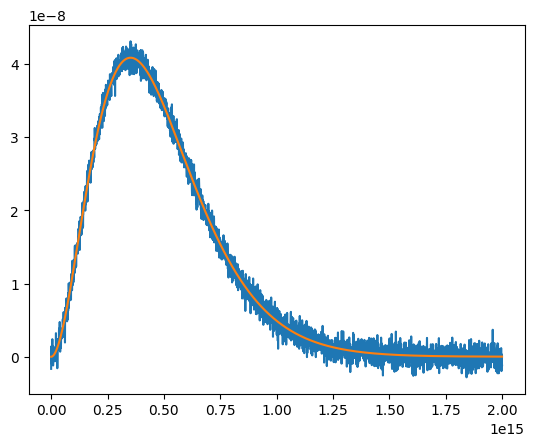

In [27]:
y3_c=planck(x3,T,h)
plt.plot(x3,y3,x3,y3_c)

Here we are plotting the estimate

<ErrorbarContainer object of 3 artists>

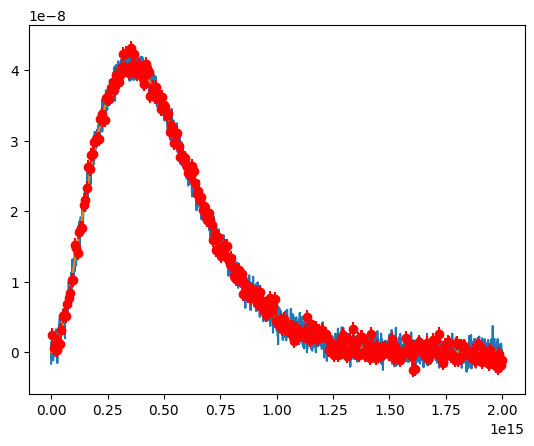

In [28]:
plt.plot(x3,y3,x3,y3_c)
plt.errorbar(x3[::10], y3[::10], np.std(y3-y3_c), fmt='ro')

In [29]:
size_of_errorbars=1.96*np.std(y3-y3_c)
print(f'size of errorbars: {1.96*np.std(y3-y3_c)}')

size of errorbars: 1.944247611639792e-09


Here we are plotting the error bars with yerr as standard deviation of the noise in the given data set.

### Observations

* So this a plot of radiation vs frequency of planck's law and we are estimating the temperature and planck's constant from this
* The stimated values of T and h we got are 6011.361511513504 and 6.643229743118619e-34 respectively.

# Dataset-4

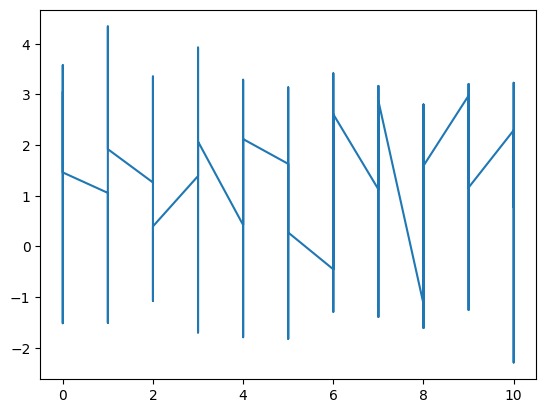

In [30]:
x4=[]
y4=[]
filename = 'dataset4.txt'
with open(filename, "r") as file:
    data=file.readlines()
    for l in data:
        l=l.split()
        x4.append(float(l[0]))
        y4.append(float(l[1]))

x4=np.asarray(x4)
y4=np.asarray(y4)
plt.plot(x4, y4)

[0.962239959304362, 0.7599583941221197, 0.9120059461643524, 1.0124390255027198, 1.1304311636644533, 0.9893082607856816, 1.0380387234220483, 0.9473934169581565, 1.0647663276347632, 1.002810241625165, 1.1478677609323475]
[0.8641702634914421, 0.7025556501631175, 0.8934988183766779, 0.9834280927364801, 1.0606541798130986, 0.9410311446901526, 0.9982410356751026, 0.916530291901234, 1.2371438082159272, 1.0074353586680458, 1.2504184009167236]


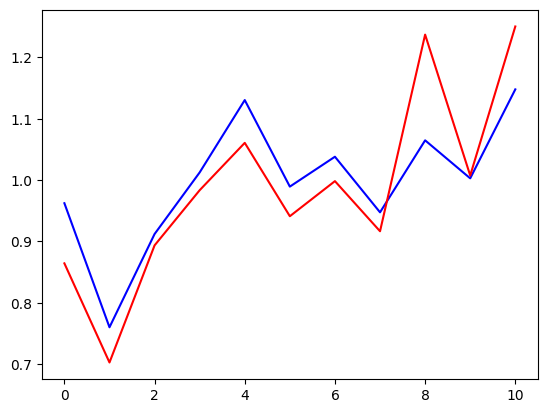

In [31]:
a=[]
for i in range(11):
    a.append([y4[b] for b in range(len(y4)) if x4[b]==float(i)])
    # print(a[i])
y4_a_1=[np.mean(a[i]) for i in range(11)]
y4_a_2=[np.median(a[i]) for i in range(11)]
x4_a=np.unique(x4)
print(y4_a_1)
print(y4_a_2)
plt.plot(x4_a,y4_a_1,'b',x4_a,y4_a_2,'r')

As the dataset has different y values for the same x values i have took the mean and median of y values for each x value and plotted them.

In [32]:
M_1 = np.column_stack([x4_a, np.ones(len(x4_a))])
(m_a1, c_a1), _, _, _ = np.linalg.lstsq(M_1, y4_a_1, rcond=None)
print(f"The estimated equation is {m_a1} t + {c_a1}")

The estimated equation is 0.019412217138470963 t + 0.8999624797727518


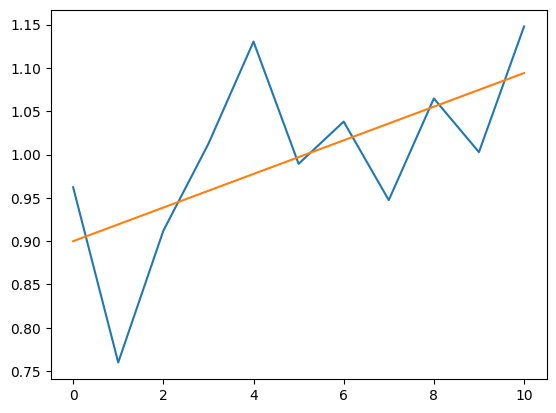

In [33]:
y_mean=stline(x4_a,m_a1,c_a1)
plt.plot(x4_a,y4_a_1,x4_a,y_mean)

I couldn't estimate what function is it so i have used the lstsq to get a linear fit and this graph is the linear fit for the mean values.

In [34]:
M_2 = np.column_stack([x4_a, np.ones(len(x4_a))])
(m_a2, c_a2), _, _, _ = np.linalg.lstsq(M_2, y4_a_2, rcond=None)
print(f"The estimated equation is {m_a2} t + {c_a2}")

The estimated equation is 0.036231688589594344 t + 0.8056694702018469


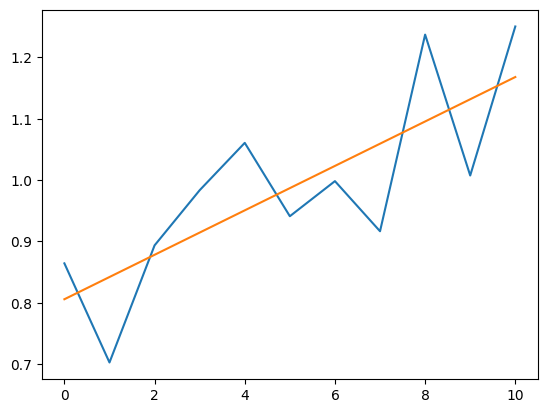

In [35]:
y_median=stline(x4_a,m_a2,c_a2)
plt.plot(x4_a,y4_a_2,x4_a,y_median)

This the linear fit for the median values

# Example

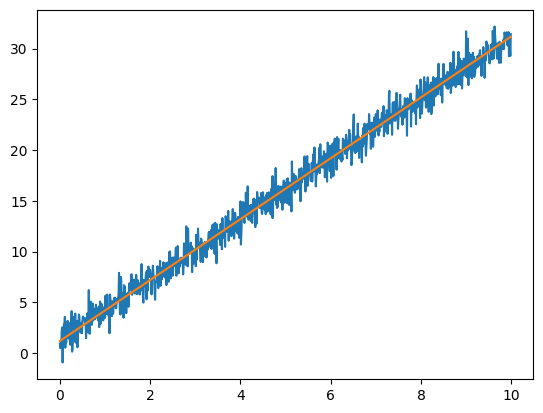

In [43]:
t = np.arange(0, 10, 0.01)
y = stline(t, 3, 1.2)
n = 1 * np.random.randn(len(t))
yn = y + n
plt.plot(t, yn, t, y)

This is the example dataset of straight line given in the presentation.

<ErrorbarContainer object of 3 artists>

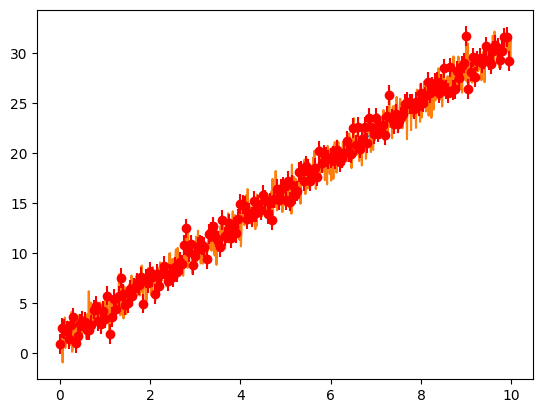

In [44]:
plt.plot(t, y, t, yn)
plt.errorbar(t[::5], yn[::5], np.std(n), fmt='ro')

In [45]:
M = np.column_stack([t, np.ones(len(t))])
(p1, p2), _, _, _ = np.linalg.lstsq(M, yn, rcond=None)
print(f"The estimated equation is {p1} t + {p2}")
%timeit np.linalg.lstsq(M, yn, rcond=None)

The estimated equation is 2.9799177887425503 t + 1.282468245341636
21.8 µs ± 1.86 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


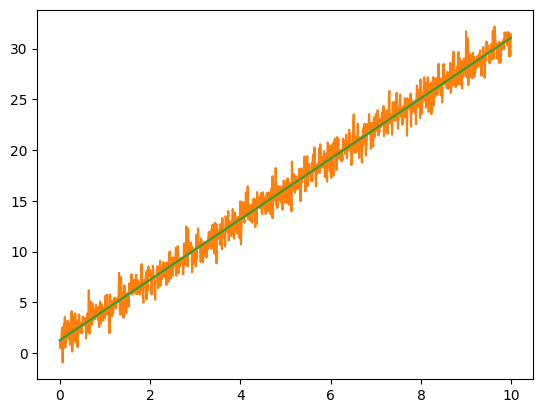

In [46]:
y_l = stline(t, p1, p2)
plt.plot(t, y, t, yn, t, y_l)

In [47]:
from scipy.optimize import curve_fit
(q1, q2), pcov = curve_fit(stline, t, yn)
print(f"The estimated equation is {q1} t + {q2}")
%timeit curve_fit(stline, t, yn)

The estimated equation is 2.9799177896569358 t + 1.282468248201741
244 µs ± 24.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


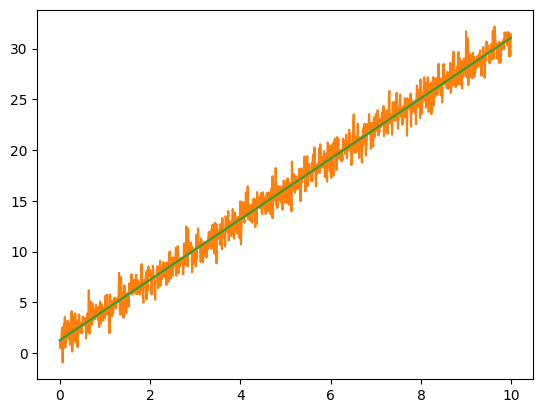

In [48]:
y_c = stline(t, q1, q2)
plt.plot(t, y, t, yn, t, y_c)

In [49]:
error_l=np.square(np.subtract(y_l, y)).mean()
print(error_l)
error_c=np.square(np.subtract(y_c, y)).mean()
print(error_c)

0.0036791412812574296
0.0036791407101623326


time c>l
accuracy c>l

### Observations

* Here we have found the estimates using both lstsq and curve_fit and we can see that curve_fit takes 10 times more time compared to lstsq.
* I have calculated the meansquare error of y values which i got using lstsq with the original values without noise and named it as error_l and similarly error_c for curve_fit.
* So we can see here that error_c is less than error_l so we can say that accuracy of curve_fit is slightly higher than lstsq.